## 프로젝트 - Movielens 영화 SBR

- 진행 사항

1. 로컬 환경 버전 충돌 이슈 해결에 오랜 시간 소요
2. Validation 결과가 나오지 않는 오류를 (오랜 시간 후에도) 해결하지 못하여 해당 상태로 제출 

In [63]:
import datetime as dt
from pathlib import Path
import os
import time
from datetime import datetime
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [64]:
import pandas
import tensorflow

print(pandas.__version__)
print(tensorflow.__version__)
print(np.__version__)

1.3.3
2.6.0
1.22.4


In [65]:
data_path = Path('./yoochoose')
train_path = data_path / 'ratings.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 2, 3], dtype={0: np.int32, 1: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['UserId', 'ItemId', 'Rating', 'Time']
    return data

data = load_data(train_path, None)
data.sort_values(['UserId', 'Time'], inplace=True)  # data를 id와 시간 순서로 정렬해줍니다.
data

,UserId,ItemId,Rating,Time
31,1,3186,4,978300019
22,1,1270,5,978300055
27,1,1721,4,978300055
37,1,1022,5,978300055
24,1,2340,3,978300103
...,...,...,...,...
1000019,6040,2917,4,997454429
999988,6040,1921,4,997454464
1000172,6040,1784,3,997454464
1000167,6040,161,3,997454486


In [66]:
data_path = Path('./yoochoose')
movie_path = data_path / 'movies.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(
        data_path,
        sep='::',
        header=None,
        usecols=[0, 1, 2],
        # dtype={0: np.int32, 1: np.int32, 2: np.int32},
        encoding='latin-1',  
        engine='python'      
    )
    data.columns = ['ItemId', 'Title', 'Genre']
    return data

data2 = load_data(movie_path, None)
data2

,ItemId,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [67]:
df = data.merge(data2, on='ItemId', how='left')

In [68]:
df

,UserId,ItemId,Rating,Time,Title,Genre
0,1,3186,4,978300019,"Girl, Interrupted (1999)",Drama
1,1,1270,5,978300055,Back to the Future (1985),Comedy|Sci-Fi
2,1,1721,4,978300055,Titanic (1997),Drama|Romance
3,1,1022,5,978300055,Cinderella (1950),Animation|Children's|Musical
4,1,2340,3,978300103,Meet Joe Black (1998),Romance
...,...,...,...,...,...,...
1000204,6040,2917,4,997454429,Body Heat (1981),Crime|Thriller
1000205,6040,1921,4,997454464,Pi (1998),Sci-Fi|Thriller
1000206,6040,1784,3,997454464,As Good As It Gets (1997),Comedy|Drama
1000207,6040,161,3,997454486,Crimson Tide (1995),Drama|Thriller|War


In [69]:
import datetime
import pytz

In [70]:
utc_time_seconds = 997454464 
utc_datetime = datetime.datetime.utcfromtimestamp(utc_time_seconds)
usa_timezone = pytz.timezone('US/Eastern')
usa_datetime = utc_datetime.replace(tzinfo=pytz.utc).astimezone(usa_timezone)
formatted_date_time = usa_datetime.strftime("%Y-%m-%d %H:%M:%S")
print(formatted_date_time)

2001-08-10 10:41:04


In [ ]:
from datetime import datetime

def convert_utc_to_datetime(df, time_col='Time', new_col='Date_time'):
    df = df.copy()
    df[new_col] = pd.to_datetime(df[time_col], unit='s')   #.dt.strftime('%Y-%m-%d %H:%M:%S')
    return df

In [72]:
df = convert_utc_to_datetime(df, time_col='Time', new_col='Date_time')

In [73]:
df

,UserId,ItemId,Rating,Time,Title,Genre,Date_time
0,1,3186,4,978300019,"Girl, Interrupted (1999)",Drama,2000-12-31 22:00:19
1,1,1270,5,978300055,Back to the Future (1985),Comedy|Sci-Fi,2000-12-31 22:00:55
2,1,1721,4,978300055,Titanic (1997),Drama|Romance,2000-12-31 22:00:55
3,1,1022,5,978300055,Cinderella (1950),Animation|Children's|Musical,2000-12-31 22:00:55
4,1,2340,3,978300103,Meet Joe Black (1998),Romance,2000-12-31 22:01:43
...,...,...,...,...,...,...,...
1000204,6040,2917,4,997454429,Body Heat (1981),Crime|Thriller,2001-08-10 14:40:29
1000205,6040,1921,4,997454464,Pi (1998),Sci-Fi|Thriller,2001-08-10 14:41:04
1000206,6040,1784,3,997454464,As Good As It Gets (1997),Comedy|Drama,2001-08-10 14:41:04
1000207,6040,161,3,997454486,Crimson Tide (1995),Drama|Thriller|War,2001-08-10 14:41:26


In [74]:
data = df.copy()
data.drop('Time', axis=1, inplace=True)

In [75]:
data

,UserId,ItemId,Rating,Title,Genre,Date_time
0,1,3186,4,"Girl, Interrupted (1999)",Drama,2000-12-31 22:00:19
1,1,1270,5,Back to the Future (1985),Comedy|Sci-Fi,2000-12-31 22:00:55
2,1,1721,4,Titanic (1997),Drama|Romance,2000-12-31 22:00:55
3,1,1022,5,Cinderella (1950),Animation|Children's|Musical,2000-12-31 22:00:55
4,1,2340,3,Meet Joe Black (1998),Romance,2000-12-31 22:01:43
...,...,...,...,...,...,...
1000204,6040,2917,4,Body Heat (1981),Crime|Thriller,2001-08-10 14:40:29
1000205,6040,1921,4,Pi (1998),Sci-Fi|Thriller,2001-08-10 14:41:04
1000206,6040,1784,3,As Good As It Gets (1997),Comedy|Drama,2001-08-10 14:41:04
1000207,6040,161,3,Crimson Tide (1995),Drama|Thriller|War,2001-08-10 14:41:26


여기서 이전 실습 내역과 가장 크게 다른 부분은 바로 SessionID 대신 UserID 항목이 들어갔다는 점입니다. 이 데이터셋은 명확한 1회 세션의 SessionID를 포함하지 않고 있습니다. 그래서 이번에는 UserID가 SessionID 역할을 해야 합니다.

Rating 정보가 포함되어 있습니다. 이전 실습 내역에서는 이런 항목이 포함되어 있지 않았으므로, 무시하고 제외할 수 있습니다. 하지만, 직전에 봤던 영화가 맘에 들었는지가 비슷한 영화를 더 고르게 하는 것과 상관이 있을 수도 있습니다. 아울러, Rating이 낮은 데이터를 어떻게 처리할지도 고민해야 합니다.

Time 항목에는 UTC time 가 포함되어, 1970년 1월 1일부터 경과된 초 단위 시간이 기재되어 있습니다.

In [76]:
data['UserId'].nunique(), data['ItemId'].nunique()

(6040, 3706)

In [77]:
data.isna().sum()

UserId       0
ItemId       0
Rating       0
Title        0
Genre        0
Date_time    0
dtype: int64

In [78]:
session_length = data.groupby('UserId').size()
session_length

UserId
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64

In [79]:
session_length.median(), session_length.mean()

(96.0, 165.5975165562914)

In [80]:
session_length.min(), session_length.max()

(20, 2314)

In [81]:
session_length.quantile(0.999)

1343.181000000005

In [82]:
session_length.quantile(0.95)

556.0

In [98]:
long_session = session_length[session_length==2314].index[0]
df[df['UserId']==long_session]

,UserId,ItemId,Rating,Title,Genre,Date_time
695642,4169,1268,5,Pump Up the Volume (1990),Drama,2000-08-03 20:09:52
695643,4169,2617,4,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,2000-08-03 20:09:52
695644,4169,2628,4,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi,2000-08-03 20:09:52
695645,4169,2653,4,Son of Dracula (1943),Horror,2000-08-03 20:09:52
695646,4169,423,3,Blown Away (1994),Action|Thriller,2000-08-03 20:09:52
...,...,...,...,...,...,...
697951,4169,3754,2,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,2002-06-15 20:52:27
697952,4169,1413,3,"Whole Wide World, The (1996)",Drama,2002-06-15 21:03:51
697953,4169,494,4,Executive Decision (1996),Action|Thriller,2002-06-15 21:16:00
697954,4169,1804,2,"Newton Boys, The (1998)",Crime|Drama,2002-06-15 21:16:23


In [84]:
length_count = session_length.groupby(session_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_999 = length_percent_cumsum[length_percent_cumsum < 0.999]

length_percent_cumsum_999

20      0.014238
21      0.029305
22      0.042053
23      0.055464
24      0.068874
          ...   
1271    0.998179
1277    0.998344
1286    0.998510
1302    0.998675
1323    0.998841
Length: 736, dtype: float64

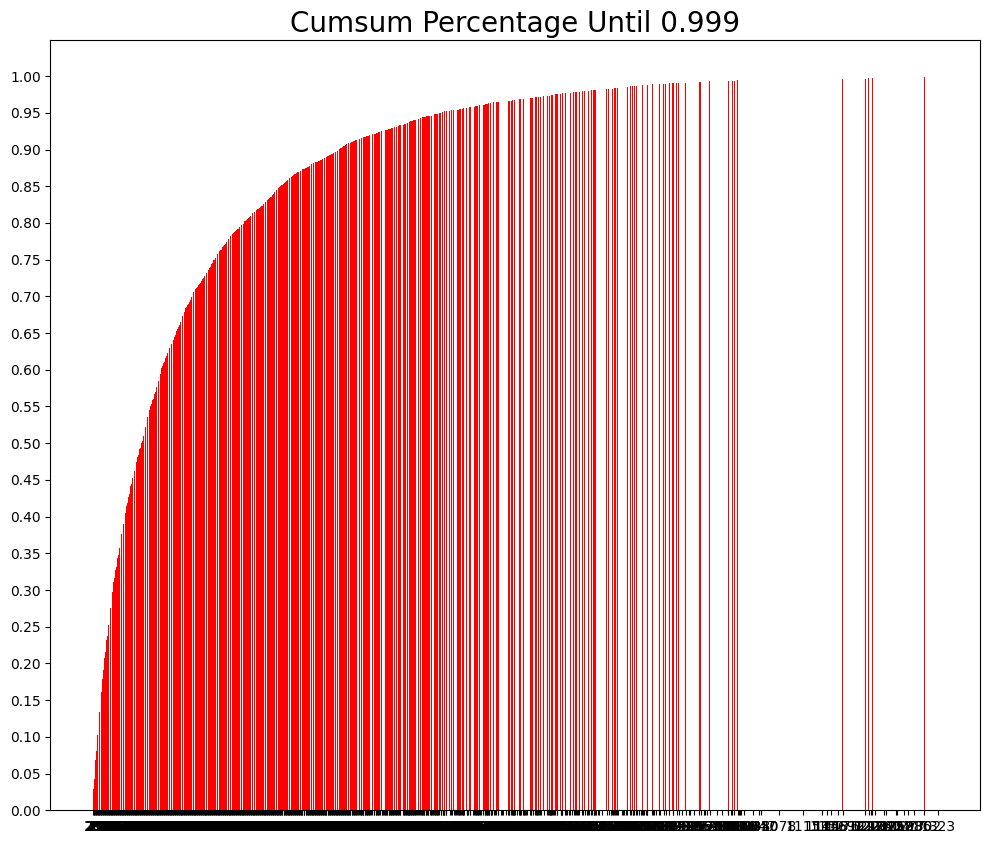

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.bar(x=length_percent_cumsum_999.index,
        height=length_percent_cumsum_999, color='red')
plt.xticks(length_percent_cumsum_999.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.999', size=20)
plt.show()

In [86]:
oldest, latest = data['Date_time'].min(), data['Date_time'].max()
print(oldest) 
print(latest)

2000-04-25 23:05:32
2003-02-28 17:49:50


In [87]:
type(latest)

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df = data.copy() # 임시 저장

In [96]:
df.shape

(1000209, 6)

In [102]:
data = df.copy() # 다시 불러오기

In [105]:
data['SessionId'] = (data['Date_time'].diff() > pd.Timedelta(minutes=30)).cumsum()

session_lengths = data.groupby('SessionId').size()
print(session_lengths.describe())

count    19157.00000
mean        52.21115
std        134.86996
min          1.00000
25%          1.00000
50%          3.00000
75%         32.00000
max       2411.00000
dtype: float64


In [106]:
data

,UserId,ItemId,Rating,Title,Genre,Date_time,SessionId
0,1,3186,4,"Girl, Interrupted (1999)",Drama,2000-12-31 22:00:19,0
1,1,1270,5,Back to the Future (1985),Comedy|Sci-Fi,2000-12-31 22:00:55,0
2,1,1721,4,Titanic (1997),Drama|Romance,2000-12-31 22:00:55,0
3,1,1022,5,Cinderella (1950),Animation|Children's|Musical,2000-12-31 22:00:55,0
4,1,2340,3,Meet Joe Black (1998),Romance,2000-12-31 22:01:43,0
...,...,...,...,...,...,...,...
1000204,6040,2917,4,Body Heat (1981),Crime|Thriller,2001-08-10 14:40:29,19155
1000205,6040,1921,4,Pi (1998),Sci-Fi|Thriller,2001-08-10 14:41:04,19155
1000206,6040,1784,3,As Good As It Gets (1997),Comedy|Drama,2001-08-10 14:41:04,19155
1000207,6040,161,3,Crimson Tide (1995),Drama|Thriller|War,2001-08-10 14:41:26,19155


Data Cleansing

In [107]:
# short_session을 제거한 다음 unpopular item을 제거하면 다시 길이가 1인 session이 생길 수 있습니다.
# 이를 위해 반복문을 통해 지속적으로 제거 합니다.
def cleanse_recursive(data: pd.DataFrame, shortest, least_click) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data, shortest)
        data = cleanse_unpopular_item(data, least_click)
        after_len = len(data)
        if before_len == after_len:
            break
    return data


def cleanse_short_session(data: pd.DataFrame, shortest):
    session_len = data.groupby('UserId').size()
    session_use = session_len[session_len >= shortest].index
    data = data[data['UserId'].isin(session_use)]
    return data


def cleanse_unpopular_item(data: pd.DataFrame, least_click):
    item_popular = data.groupby('ItemId').size()
    item_use = item_popular[item_popular >= least_click].index
    data = data[data['ItemId'].isin(item_use)]
    return data

In [108]:
data = cleanse_recursive(data, shortest=2, least_click=5)
data

,UserId,ItemId,Rating,Title,Genre,Date_time,SessionId
0,1,3186,4,"Girl, Interrupted (1999)",Drama,2000-12-31 22:00:19,0
1,1,1270,5,Back to the Future (1985),Comedy|Sci-Fi,2000-12-31 22:00:55,0
2,1,1721,4,Titanic (1997),Drama|Romance,2000-12-31 22:00:55,0
3,1,1022,5,Cinderella (1950),Animation|Children's|Musical,2000-12-31 22:00:55,0
4,1,2340,3,Meet Joe Black (1998),Romance,2000-12-31 22:01:43,0
...,...,...,...,...,...,...,...
1000204,6040,2917,4,Body Heat (1981),Crime|Thriller,2001-08-10 14:40:29,19155
1000205,6040,1921,4,Pi (1998),Sci-Fi|Thriller,2001-08-10 14:41:04,19155
1000206,6040,1784,3,As Good As It Gets (1997),Comedy|Drama,2001-08-10 14:41:04,19155
1000207,6040,161,3,Crimson Tide (1995),Drama|Thriller|War,2001-08-10 14:41:26,19155


Rating 검토

In [ ]:
# ratings # 진행 보류

Train / Valid /Test split

In [109]:
def split_by_date(data: pd.DataFrame, n_days: int):
    final_time = data['Date_time'].max()
    session_last_time = data.groupby('SessionId')['Date_time'].max()
    session_in_train = session_last_time[session_last_time < final_time - dt.timedelta(n_days)].index
    session_in_test = session_last_time[session_last_time >= final_time - dt.timedelta(n_days)].index

    before_date = data[data['SessionId'].isin(session_in_train)]
    after_date = data[data['SessionId'].isin(session_in_test)]
    after_date = after_date[after_date['ItemId'].isin(before_date['ItemId'])]
    return before_date, after_date

In [110]:
tr, test = split_by_date(data, n_days=10)
tr, val = split_by_date(tr, n_days=10)

In [115]:
# data에 대한 정보를 살펴봅니다.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Sessions: {data["SessionId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Date_time"].min()}\n'
          f'\t Last Time : {data["Date_time"].max()}\n')

In [116]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 980676
	 Sessions: 18985
	 Items: 3416
	 First Time : 2000-04-25 23:05:32
	 Last Time : 2003-02-08 15:14:46

* valid Set Stats Info
	 Events: 5283
	 Sessions: 64
	 Items: 1733
	 First Time : 2000-05-17 23:20:03
	 Last Time : 2003-02-18 17:36:46

* test Set Stats Info
	 Events: 13652
	 Sessions: 82
	 Items: 2458
	 First Time : 2000-05-01 01:03:51
	 Last Time : 2003-02-28 17:49:50



In [117]:
# train set에 없는 아이템이 val, test기간에 생길 수 있으므로 train data를 기준으로 인덱싱합니다.
id2idx = {item_id : index for index, item_id in enumerate(tr['ItemId'].unique())}

def indexing(df, id2idx):
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x, -1))  # id2idx에 없는 아이템은 모르는 값(-1) 처리 해줍니다.
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

In [118]:
save_path = data_path / 'processed_movie'
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

Session Dataset

In [119]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['SessionId'].nunique())  # indexing to SessionId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['SessionId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('SessionId').size().cumsum()
        return offsets

In [120]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

,UserId,ItemId,Rating,Title,Genre,Date_time,SessionId,item_idx
0,1,3186,4,"Girl, Interrupted (1999)",Drama,2000-12-31 22:00:19,0,0
1,1,1270,5,Back to the Future (1985),Comedy|Sci-Fi,2000-12-31 22:00:55,0,1
2,1,1721,4,Titanic (1997),Drama|Romance,2000-12-31 22:00:55,0,2
3,1,1022,5,Cinderella (1950),Animation|Children's|Musical,2000-12-31 22:00:55,0,3
4,1,2340,3,Meet Joe Black (1998),Romance,2000-12-31 22:01:43,0,4
5,1,1836,5,"Last Days of Disco, The (1998)",Drama,2000-12-31 22:02:52,0,5
6,1,3408,4,Erin Brockovich (2000),Drama,2000-12-31 22:04:35,0,6
7,1,2804,5,"Christmas Story, A (1983)",Comedy|Drama,2000-12-31 22:11:59,0,7
8,1,1207,4,To Kill a Mockingbird (1962),Drama,2000-12-31 22:11:59,0,8
9,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-31 22:12:40,0,9


In [121]:
tr_dataset.click_offsets

array([     0,     40,    692, ..., 980654, 980675, 980676])

In [122]:
tr_dataset.session_idx

array([    0,     1,     2, ..., 18982, 18983, 18984])

SessionDataLoader

In [123]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=50):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize 메소드에서 확인해주세요.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """

        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # 첫 배치에 사용할 세션 Index를 가져옵니다.
        last_session = self.batch_size - 1    # 마지막으로 다루고 있는 세션 Index를 저장해둡니다.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data 상에서 session이 시작된 위치를 가져옵니다.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # session이 끝난 위치 바로 다음 위치를 가져옵니다.
        mask = np.array([])   # session의 모든 아이템을 다 돌은 경우 mask에 추가해줄 것입니다.
        finished = False         # data를 전부 돌았는지 기록하기 위한 변수입니다.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):  
        # 다음 배치 데이터를 생성하기 위해 상태를 update합니다.
        
        start += min_len   # __iter__에서 min_len 만큼 for문을 돌았으므로 start를 min_len 만큼 더해줍니다.
        mask = np.arange(self.batch_size)[(end - start) == 1]  
        # end는 다음 세션이 시작되는 위치인데 start와 한 칸 차이난다는 것은 session이 끝났다는 뜻입니다. mask에 기록해줍니다.

        for i, idx in enumerate(mask, start=1):  # mask에 추가된 세션 개수만큼 새로운 세션을 돌것입니다.
            new_session = last_session + i  
            if new_session > self.dataset.session_idx[-1]:  # 만약 새로운 세션이 마지막 세션 index보다 크다면 모든 학습데이터를 돈 것입니다.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # 종료된 세션 대신 새로운 세션의 시작점을 기록합니다.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # 마지막 세션의 위치를 기록해둡니다.
        return start, end, mask, last_session, finished

In [124]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)
tr_dataset.df.head(15)

,UserId,ItemId,Rating,Title,Genre,Date_time,SessionId,item_idx
0,1,3186,4,"Girl, Interrupted (1999)",Drama,2000-12-31 22:00:19,0,0
1,1,1270,5,Back to the Future (1985),Comedy|Sci-Fi,2000-12-31 22:00:55,0,1
2,1,1721,4,Titanic (1997),Drama|Romance,2000-12-31 22:00:55,0,2
3,1,1022,5,Cinderella (1950),Animation|Children's|Musical,2000-12-31 22:00:55,0,3
4,1,2340,3,Meet Joe Black (1998),Romance,2000-12-31 22:01:43,0,4
5,1,1836,5,"Last Days of Disco, The (1998)",Drama,2000-12-31 22:02:52,0,5
6,1,3408,4,Erin Brockovich (2000),Drama,2000-12-31 22:04:35,0,6
7,1,2804,5,"Christmas Story, A (1983)",Comedy|Drama,2000-12-31 22:11:59,0,7
8,1,1207,4,To Kill a Mockingbird (1962),Drama,2000-12-31 22:11:59,0,8
9,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-31 22:12:40,0,9


In [125]:
iter_ex = iter(tr_data_loader)

In [126]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [  0  40 165  74]
Label Item Idx are :       [  1  41 514 728]
Previous Masked Input Idx are [3]


Modeling   
Evaluation Metric

In [127]:
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0


def recall_k(pred, truth: int, k: int) -> int:
    answer = truth in pred[:k]
    return int(answer)

Model Architecture 

In [129]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [130]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [148]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['SessionId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=256, hsz=50, drop_rate=0.1, lr=0.001, epochs=3, k=20)

In [149]:
model = create_model(args)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(256, 1, 3416)]          0         
_________________________________________________________________
GRU (GRU)                    [(256, 50), (256, 50)]    520200    
_________________________________________________________________
dropout_2 (Dropout)          (256, 50)                 0         
_________________________________________________________________
dense_2 (Dense)              (256, 3416)               174216    
Total params: 694,416
Trainable params: 694,416
Non-trainable params: 0
_________________________________________________________________


In [160]:
# train 셋으로 학습하면서 valid 셋으로 검증합니다.
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['SessionId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  # 종료된 session은 hidden_state를 초기화합니다. 아래 메서드에서 확인해주세요.

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        # val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  # valid set에 대해 검증합니다.
        val_batch_size = min(args.batch_size, args.val['SessionId'].nunique())
        val_recall, val_mrr = get_metrics(args.val, model, args, args.k, batch_size=val_batch_size)

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")


def get_metrics(data, model, args, k: int, batch_size: int):
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=batch_size)

    recall_list, mrr_list = [], []
    total_step = len(data) - data['SessionId'].nunique()

    for inputs, label, mask in tqdm(loader, total=max(1, total_step // batch_size), desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING').numpy()

        for i in range(len(inputs)):
            try:
                true_label = int(label[i])
                if true_label >= args.num_items or true_label < 0:
                    continue  

                recall = recall_k(pred_arg[i], true_label, k)
                mrr = mrr_k(pred_arg[i], true_label, k)

                recall_list.append(recall)
                mrr_list.append(mrr)
            except Exception as e:
                print(f"[경고] 예측 평가 중 오류 발생: {e}")
                continue

    recall = np.mean(recall_list) if recall_list else 0.0
    mrr = np.mean(mrr_list) if mrr_list else 0.0
    return recall, mrr

In [ ]:
# args.num_items = max(args.tr['ItemId'].max(), args.val['ItemId'].max()) + 1

In [154]:
print("Validation 세션 수:", args.val['SessionId'].nunique())
print("현재 batch_size:", args.batch_size)

Validation 세션 수: 64
현재 batch_size: 256


In [ ]:
# print("Train max ItemId:", args.tr['ItemId'].max())
# print("Validation max ItemId:", args.val['ItemId'].max())
# print("args.num_items:", args.num_items)

Train max ItemId: 3952
Validation max ItemId: 3952
args.num_items: 3953


In [ ]:
train_model(model, args)

Evaluation:   0%|          | 0/81 [00:00<?, ?it/s]


	 - Recall@20 epoch 1: 0.000000
	 - MRR@20    epoch 1: 0.000000



Evaluation:   0%|          | 0/81 [00:00<?, ?it/s]


	 - Recall@20 epoch 2: 0.000000
	 - MRR@20    epoch 2: 0.000000



Evaluation:   0%|          | 0/81 [00:00<?, ?it/s]

	 - Recall@20 epoch 3: 0.000000
	 - MRR@20    epoch 3: 0.000000

